In [112]:
pip install mapclassify

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [114]:
df = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")
new_df = df.drop(['VIN (1-10)', 'County', 'Postal Code', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract'], axis = 1)
new_df.head()

,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Vehicle Location,Electric Utility
0,Seattle,WA,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Bothell,WA,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC
2,Seattle,WA,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,Issaquah,WA,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Suquamish,WA,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC


In [115]:
new_df.isnull().sum()

,0
City,5
State,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Electric Range,0
Base MSRP,0
Vehicle Location,9


In [116]:
new_df = new_df.dropna()
new_df.isnull().sum()

,0
City,0
State,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Electric Range,0
Base MSRP,0
Vehicle Location,0


In [117]:
#converting state abbreviations to actual names in the main dataframe
state_abbrev_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}
new_df['State'] = new_df['State'].map(state_abbrev_to_name)
new_df.head()

,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Vehicle Location,Electric Utility
0,Seattle,Washington,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Bothell,Washington,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC
2,Seattle,Washington,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,Issaquah,Washington,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Suquamish,Washington,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC


In [118]:
state_details = new_df['State'].value_counts().reset_index()
top_ten_states = state_details.head(50)
top_ten_states.columns = ['name', 'Count']
top_ten_states

,name,Count
0,Washington,177473
1,California,101
2,Virginia,46
3,Maryland,31
4,Texas,23
5,North Carolina,16
6,Illinois,15
7,Colorado,12
8,Arizona,10
9,Florida,10


In [119]:
url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
us_states = gpd.read_file(url)
#us_states.head()

merged = top_ten_states.merge(us_states, on='name')
merged.head()

,name,Count,id,density,geometry
0,Washington,177473,53,102.60,"MULTIPOLYGON (((-117.03336 49.00024, -117.0443..."
1,California,101,06,241.70,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."
2,Virginia,46,51,204.50,"MULTIPOLYGON (((-75.39766 38.0135, -75.2443 38..."
3,Maryland,31,24,596.30,"MULTIPOLYGON (((-75.99464 37.95325, -76.01655 ..."
4,Texas,23,48,98.07,"POLYGON ((-101.81294 36.50186, -100.00008 36.5..."


In [120]:
print(merged.shape)

(43, 5)


In [121]:
import geopandas as gpd

merged = gpd.GeoDataFrame(merged, geometry='geometry', crs=us_states.crs)

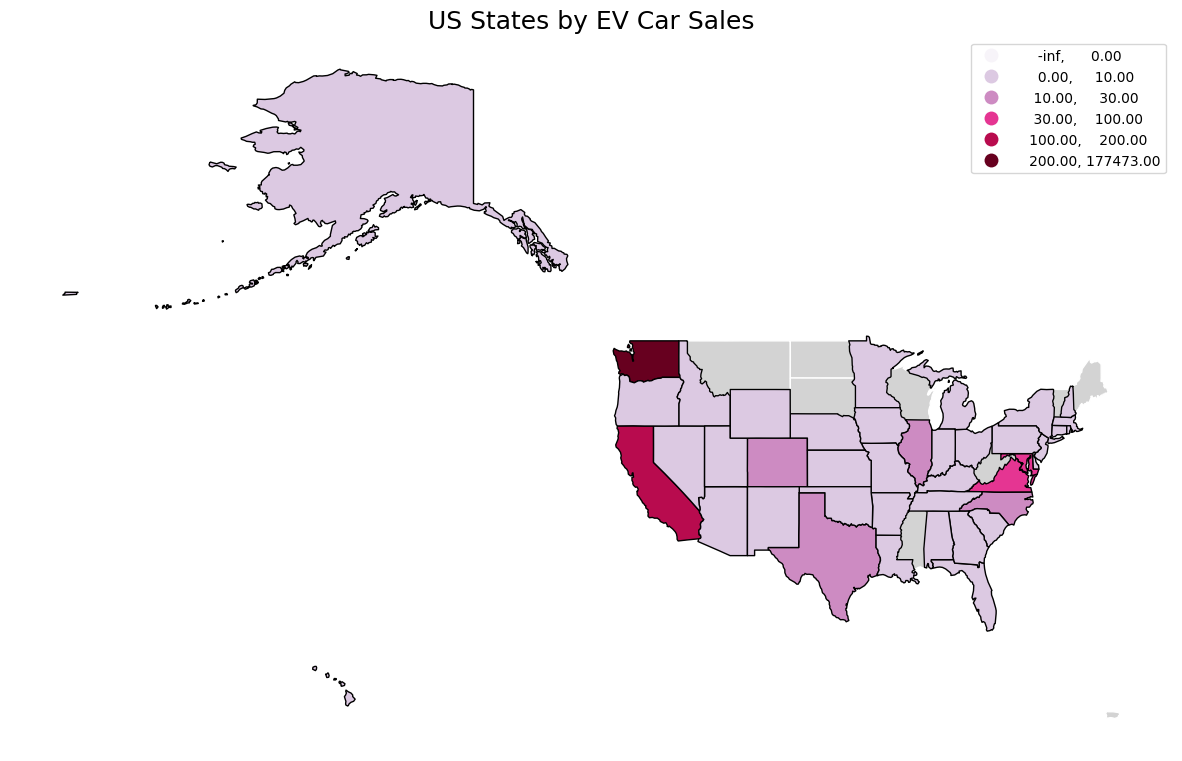

In [122]:
import matplotlib.pyplot as plt
import geopandas as gpd

bins = [0, 10, 30, 100, 200, merged['Count'].max()]

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

#base map
us_states.plot(ax=ax, color='lightgray', edgecolor='white')

#plot with custom bins
merged.plot(
    ax=ax,
    column='Count',
    cmap='PuRd',
    legend=True,
    edgecolor='black',
    scheme='user_defined',
    classification_kwds={'bins': bins}
)

# Title and cleanup
plt.title("US States by EV Car Sales", fontsize=18)
plt.axis('off')
plt.show()


In [123]:
charging_stations = pd.read_csv("/content/charging_stations.csv", encoding = "latin1")
new_charging_stations = charging_stations[['latitude', 'longitude', 'x', 'y'] ]
new_charging_stations.head()

<ipython-input-123-cc325886c62a>:1: DtypeWarning: Columns (15,29,32,34,35,38,47,52,53,54,56,57,60,61,62,63,64,67,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  charging_stations = pd.read_csv("/content/charging_stations.csv", encoding = "latin1")


,latitude,longitude,x,y
0,32.367916,-86.267021,-86.267021,32.367916
1,33.821911,-84.367461,-84.367461,33.821911
2,33.760256,-84.543822,-84.543822,33.760256
3,35.362213,-94.375338,-94.375338,35.362213
4,42.374706,-71.026549,-71.026549,42.374706


In [124]:
#converting latitude and longitude into coordinates
geometry = [Point(xy) for xy in zip(new_charging_stations['longitude'], new_charging_stations['latitude'])]
charging_gdf = gpd.GeoDataFrame(new_charging_stations, geometry=geometry)
charging_gdf.set_crs(epsg=4326, inplace=True)
charging_gdf.head()

,latitude,longitude,x,y,geometry
0,32.367916,-86.267021,-86.267021,32.367916,POINT (-86.26702 32.36792)
1,33.821911,-84.367461,-84.367461,33.821911,POINT (-84.36746 33.82191)
2,33.760256,-84.543822,-84.543822,33.760256,POINT (-84.54382 33.76026)
3,35.362213,-94.375338,-94.375338,35.362213,POINT (-94.37534 35.36221)
4,42.374706,-71.026549,-71.026549,42.374706,POINT (-71.02655 42.37471)


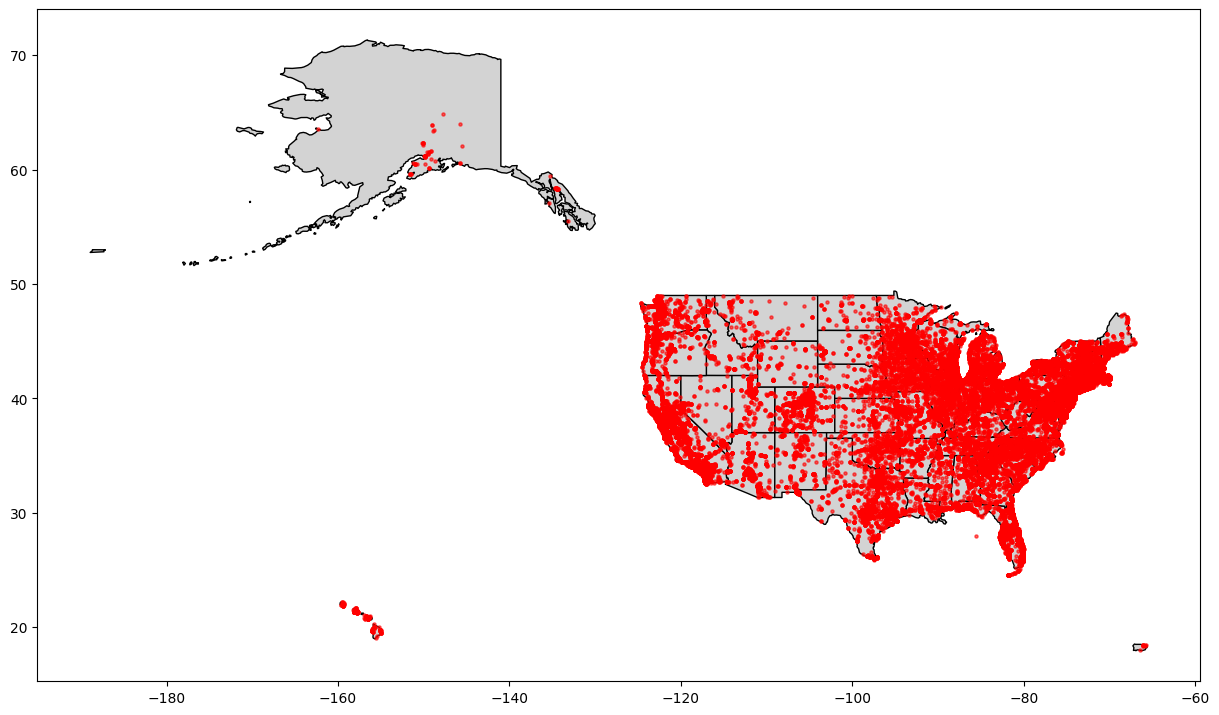

In [125]:
#plotting charging stations on the map
fig, ax = plt.subplots(figsize=(15, 10))
us_states.plot(ax=ax, color='lightgray', edgecolor='black')
charging_gdf.plot(ax=ax, color='red', markersize=5, alpha=0.6, label='Charging Stations')
plt.show()

In [126]:
make_ev = df[['Make', 'Model', 'Electric Vehicle Type']]

,0
Make,0
Model,0
Electric Vehicle Type,0


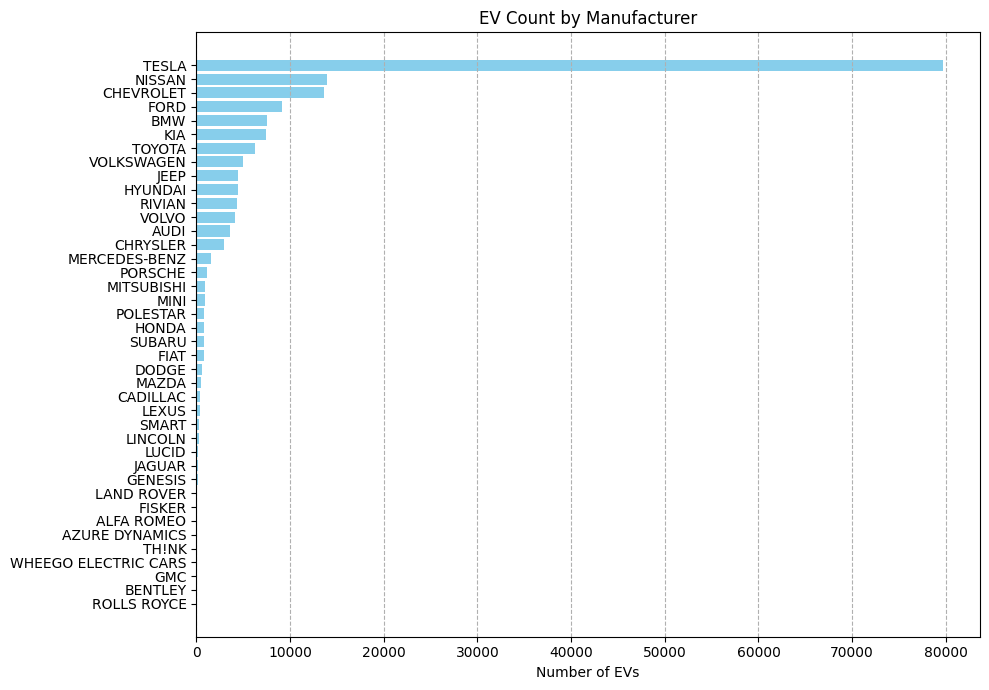

In [127]:
counts = df.groupby('Make')['Electric Vehicle Type'].count().sort_values()
plt.figure(figsize=(10, 7))
plt.barh(counts.index, counts.values, color='skyblue')
plt.grid(axis='x', linestyle='--', alpha=1)
plt.xlabel("Number of EVs")
plt.title("EV Count by Manufacturer")
plt.tight_layout()
plt.show()

In [128]:
range_BEV = new_df[new_df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']['Electric Range'].mean()

In [129]:
range_PHEV = new_df[new_df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']['Electric Range'].mean()

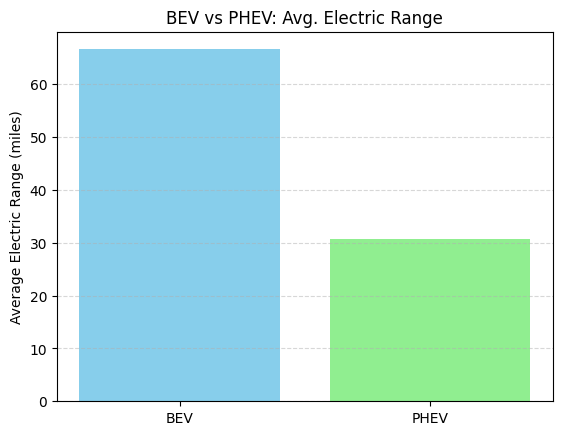

In [130]:
plt.bar(['BEV', 'PHEV'], [range_BEV, range_PHEV], color=['skyblue', 'lightgreen'])

plt.ylabel('Average Electric Range (miles)')
plt.title('BEV vs PHEV: Avg. Electric Range')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
